In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("swiggy_cleaned (1).csv")

In [3]:
df.head()

,hotel_name,rating,time_minutes,food_type,location,offer_above,offer_percentage
0,McDonald's,4.5,27,"Burgers, Beverages, Cafe, Desserts",Kandivali East,75,30
1,KFC,4.2,30,"Burgers, Biryani, American, Snacks, Fast Food",Kandivali East,80,40
2,Domino's Pizza,4.3,25,"Pizzas, Italian, Pastas, Desserts",Thakur Village,299,not_available
3,Charcoal Eats - Biryani & Beyond,4.3,24,"Biryani, Kebabs, Hyderabadi, North Indian",Malad Kan East,100,50
4,Sandwizzaa,4.6,22,"Snacks, Fast Food, Beverages, Jain",Kandivali East,120,60


In [4]:
df.describe()

,hotel_name,rating,time_minutes,food_type,location,offer_above,offer_percentage
count,1749,1749,1406,1749,1749,1749,1749
unique,1729,73,79,1009,126,52,10
top,McDonald's,4.4,44,Chinese,Borivali,not_available,not_available
freq,2,193,58,79,309,981,1341


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   hotel_name        1749 non-null   object
 1   rating            1749 non-null   object
 2   time_minutes      1406 non-null   object
 3   food_type         1749 non-null   object
 4   location          1749 non-null   object
 5   offer_above       1749 non-null   object
 6   offer_percentage  1749 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


In [6]:
df.dtypes

hotel_name          object
rating              object
time_minutes        object
food_type           object
location            object
offer_above         object
offer_percentage    object
dtype: object

identifying unique values in rating column

In [7]:
df.rating.unique()

array(['4.5 ', '4.2 ', '4.3 ', '4.6 ', '3.8 ', '4.4 ', '4.7 ', '4.1 ',
       '4 ', '33 mins', '3.6 ', '3.5 ', '4.8 ', '3.9 ', '27 mins', '2.3 ',
       '3.4 ', '3 ', '34 mins', '32 mins', '4.9 ', '36 mins', '2.2 ',
       '3.7 ', '41 mins', '3.3 ', '53 mins', '46 mins', '3.2 ', '3.1 ',
       '40 mins', '2.7 ', '23 mins', '45 mins', '48 mins', '43 mins',
       '42 mins', '50 mins', '39 mins', '38 mins', '47 mins', '2.6 ',
       '5 ', '52 mins', '2.8 ', '13 mins', '24 mins', '2.9 ', '28 mins',
       '35 mins', '59 mins', '2.4 ', '29 mins', '2 ', '19 mins',
       '49 mins', '51 mins', '2.5 ', '54 mins', '31 mins', '1.5 ',
       '44 mins', '60 mins', '61 mins', '30 mins', '37 mins', '26 mins',
       '25 mins', '2.1 ', '57 mins', '55 mins', '63 mins', '1.6 '],
      dtype=object)

using function to remove characters from numerical data

In [8]:
def rating_col(rating):
    if isinstance(rating,int):
        return rating
    elif isinstance(rating,float):
        return rating
    elif 'mins' in rating:
        return (rating.replace(' mins',''))
    return rating
df['rating']=df['rating'].apply(rating_col)

changning datatype of rating column which was previously in object

In [9]:
df['rating']=df['rating'].astype(float)

In [10]:
df.rating.dtype

dtype('float64')

replacing outliers or extra big values with the median

In [12]:
rating_avg=df['rating'].median()
df['rating']=df['rating'].replace(34.,rating_avg)
df['rating']=df['rating'].replace(32.,rating_avg)
df['rating']=df['rating'].replace(36.,rating_avg)
df['rating']=df['rating'].replace(41.,rating_avg)
df['rating']=df['rating'].replace(53.,rating_avg)
df['rating']=df['rating'].replace(46.,rating_avg)
df['rating']=df['rating'].replace(40.,rating_avg)
df['rating']=df['rating'].replace(23.,rating_avg)
df['rating']=df['rating'].replace(45.,rating_avg)
df['rating']=df['rating'].replace(48.,rating_avg)
df['rating']=df['rating'].replace(43.,rating_avg)
df['rating']=df['rating'].replace(42.,rating_avg)
df['rating']=df['rating'].replace(50.,rating_avg)
df['rating']=df['rating'].replace(39.,rating_avg)
df['rating']=df['rating'].replace(38.,rating_avg)
df['rating']=df['rating'].replace(47.,rating_avg)
df['rating']=df['rating'].replace(52.,rating_avg)
df['rating']=df['rating'].replace(13.,rating_avg)
df['rating']=df['rating'].replace(24.,rating_avg)
df['rating']=df['rating'].replace(28.,rating_avg)
df['rating']=df['rating'].replace(35.,rating_avg)
df['rating']=df['rating'].replace(59.,rating_avg)
df['rating']=df['rating'].replace(29.,rating_avg)
df['rating']=df['rating'].replace(19.,rating_avg)
df['rating']=df['rating'].replace(49.,rating_avg)
df['rating']=df['rating'].replace(51.,rating_avg)
df['rating']=df['rating'].replace(54.,rating_avg)
df['rating']=df['rating'].replace(31.,rating_avg)
df['rating']=df['rating'].replace(44.,rating_avg)
df['rating']=df['rating'].replace(61.,rating_avg)
df['rating']=df['rating'].replace(30.,rating_avg)
df['rating']=df['rating'].replace(37.,rating_avg)
df['rating']=df['rating'].replace(26.,rating_avg)
df['rating']=df['rating'].replace(25.,rating_avg)
df['rating']=df['rating'].replace(57.,rating_avg)
df['rating']=df['rating'].replace(55.,rating_avg)
df['rating']=df['rating'].replace(63.,rating_avg)
df['rating']=df['rating'].replace(60.,rating_avg)
df['rating']=df['rating'].replace(4.,rating_avg)
df['rating']=df['rating'].replace(33.,rating_avg)
df['rating']=df['rating'].replace(3.,rating_avg)
df['rating']=df['rating'].replace(27.,rating_avg)
df['rating']=df['rating'].replace(5.,rating_avg)
df['rating']=df['rating'].replace(2.,rating_avg)













cleaned rating column

In [13]:
df['rating'].unique()

array([4.5, 4.2, 4.3, 4.6, 3.8, 4.4, 4.7, 4.1, 3.6, 3.5, 4.8, 3.9, 2.3,
       3.4, 4.9, 2.2, 3.7, 3.3, 3.2, 3.1, 2.7, 2.6, 2.8, 2.9, 2.4, 2.5,
       1.5, 2.1, 1.6])

### checking null values in percentage

In [14]:
df.isnull().sum()*100/len(df)


hotel_name           0.000000
rating               0.000000
time_minutes        19.611206
food_type            0.000000
location             0.000000
offer_above          0.000000
offer_percentage     0.000000
dtype: float64

unique values in time_minuates columns

In [15]:
df['time_minutes'].unique()

array(['27', '30', '25', '24', '22', '32', '14', '13', '17', '34', '18',
       '15', '26', '16', '23', '29', '35', '33', '11-21', '36', '21',
       '20', '28', nan, '31', '16-26', '17-27', '19', '10-20', '18-28',
       '13-23', '22-32', '39', '7-17', '24-34', '40', '23-32', '37', '49',
       '38', '47', '43', '54', '45', '50', '42', '48', '46', '56', '44',
       '55', '51', '52', '70', '53', '64', '58', '65', '57', '80', '59',
       '41', '73', '67', '61', '66', '78', '60', '63', '12', '81', '62',
       '69', '68', '79', '75', '74', '25-35', '72', '71'], dtype=object)

using function to remove characters from numerical data

In [16]:
def time_col(mins):
    if isinstance(mins, int):
        return mins
    elif isinstance(mins,float):
        return mins
    elif '-' in mins:
        return mins.replace('-','')
    return mins
df['time_minutes']=df['time_minutes'].apply(time_col)

In [17]:
df['time_minutes'].unique()

array(['27', '30', '25', '24', '22', '32', '14', '13', '17', '34', '18',
       '15', '26', '16', '23', '29', '35', '33', '1121', '36', '21', '20',
       '28', nan, '31', '1626', '1727', '19', '1020', '1828', '1323',
       '2232', '39', '717', '2434', '40', '2332', '37', '49', '38', '47',
       '43', '54', '45', '50', '42', '48', '46', '56', '44', '55', '51',
       '52', '70', '53', '64', '58', '65', '57', '80', '59', '41', '73',
       '67', '61', '66', '78', '60', '63', '12', '81', '62', '69', '68',
       '79', '75', '74', '2535', '72', '71'], dtype=object)

dropping  null values from entire dataset

In [18]:
df.dropna(inplace=True)

changing datatype from object to integar

In [19]:
df['time_minutes']=df['time_minutes'].astype(int)

In [20]:
df['time_minutes'].unique()

array([  27,   30,   25,   24,   22,   32,   14,   13,   17,   34,   18,
         15,   26,   16,   23,   29,   35,   33, 1121,   36,   21,   20,
         28,   31, 1626, 1727,   19, 1020, 1828, 1323, 2232,   39,  717,
       2434,   40, 2332,   37,   49,   38,   47,   43,   54,   45,   50,
         42,   48,   46,   56,   44,   55,   51,   52,   70,   53,   64,
         58,   65,   57,   80,   59,   41,   73,   67,   61,   66,   78,
         60,   63,   12,   81,   62,   69,   68,   79,   75,   74, 2535,
         72,   71])

replacing outliers with medians

In [21]:
mean_value=df['time_minutes'].median()
df['time_minutes']=df['time_minutes'].replace(1121,mean_value)
df['time_minutes']=df['time_minutes'].replace(1626,mean_value)
df['time_minutes']=df['time_minutes'].replace(1727,mean_value)
df['time_minutes']=df['time_minutes'].replace(1020,mean_value)
df['time_minutes']=df['time_minutes'].replace(1828,mean_value)
df['time_minutes']=df['time_minutes'].replace(1323,mean_value)
df['time_minutes']=df['time_minutes'].replace(2232,mean_value)
df['time_minutes']=df['time_minutes'].replace(717,mean_value)
df['time_minutes']=df['time_minutes'].replace(2434,mean_value)
df['time_minutes']=df['time_minutes'].replace(2332,mean_value)
df['time_minutes']=df['time_minutes'].replace(2535,mean_value)

In [22]:
df['time_minutes'].unique()

array([27, 30, 25, 24, 22, 32, 14, 13, 17, 34, 18, 15, 26, 16, 23, 29, 35,
       33, 43, 36, 21, 20, 28, 31, 19, 39, 40, 37, 49, 38, 47, 54, 45, 50,
       42, 48, 46, 56, 44, 55, 51, 52, 70, 53, 64, 58, 65, 57, 80, 59, 41,
       73, 67, 61, 66, 78, 60, 63, 12, 81, 62, 69, 68, 79, 75, 74, 72, 71])

In [23]:
df['offer_above'].unique()

array(['75', '80', '299', '100', '120', '150', 'not_available', '50',
       '149', '799', '99', '599', '449', '999', '749', '45', '699',
       'FREE ITEM', '40', '249', '169', '500', '700', '1500', '900',
       '499', '179', '600', '20% OFF', '110', '159', '1900', '1000',
       '899', '399', '129', '800', '125', '1999', '199', '1199', '1200',
       '349', '300', '1299', '200', '1300', '1099', '175', '350', '250'],
      dtype=object)

In [24]:
df['offer_above']=df['offer_above'].replace('not_available','0')
df['offer_above']=df['offer_above'].replace('FREE ITEM','1')
df['offer_above']=df['offer_above'].replace('20% OFF','279')



In [25]:
df['offer_above']=df['offer_above'].astype(int)

In [26]:
df['offer_above'].unique()

array([  75,   80,  299,  100,  120,  150,    0,   50,  149,  799,   99,
        599,  449,  999,  749,   45,  699,    1,   40,  249,  169,  500,
        700, 1500,  900,  499,  179,  600,  279,  110,  159, 1900, 1000,
        899,  399,  129,  800,  125, 1999,  199, 1199, 1200,  349,  300,
       1299,  200, 1300, 1099,  175,  350,  250])

In [27]:
df['offer_percentage'].unique()

array(['30', '40', 'not_available', '50', '60', '20', '15', '10', '25',
       '35'], dtype=object)

In [28]:
df['offer_percentage']=df['offer_percentage'].replace('not_available','0')
df['offer_percentage']=df['offer_percentage'].astype(int)

In [29]:
df.duplicated().sum()

19

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
#df.to_csv('cleaned_swiggy.csv')

# EDA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel_name        1387 non-null   object 
 1   rating            1387 non-null   float64
 2   time_minutes      1387 non-null   int32  
 3   food_type         1387 non-null   object 
 4   location          1387 non-null   object 
 5   offer_above       1387 non-null   int32  
 6   offer_percentage  1387 non-null   int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 70.4+ KB


In [33]:
df.describe()

,rating,time_minutes,offer_above,offer_percentage
count,1387.000000,1387.000000,1387.000000,1387.000000
mean,4.144845,42.599135,231.049748,6.979092
std,0.462341,11.360012,353.382453,14.544364
min,1.500000,12.000000,0.000000,0.000000
25%,4.100000,35.000000,0.000000,0.000000
50%,4.300000,43.000000,0.000000,0.000000
75%,4.400000,50.000000,449.000000,10.000000
max,4.900000,81.000000,1999.000000,60.000000


In [35]:
df.columns

Index(['hotel_name', 'rating', 'time_minutes', 'food_type', 'location',
       'offer_above', 'offer_percentage'],
      dtype='object')

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

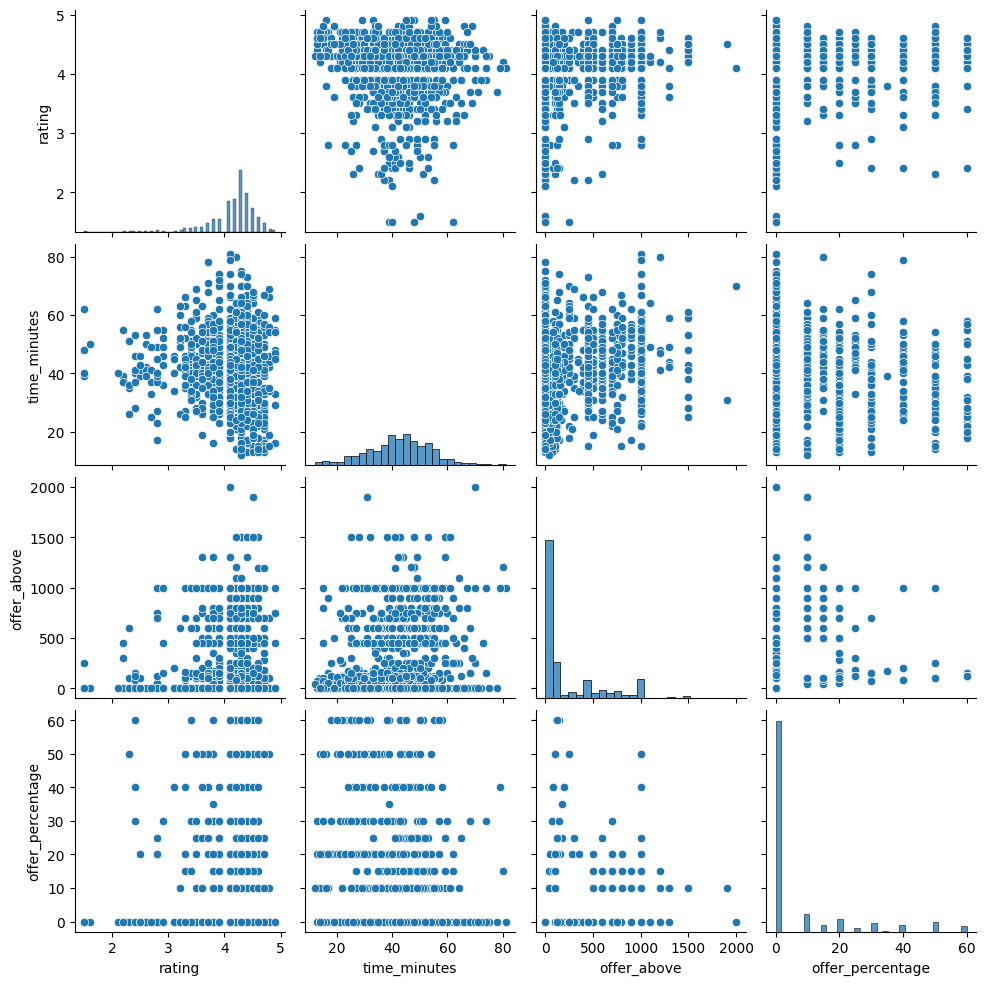

In [38]:
sns.pairplot(df)

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='offer_above', ylabel='Count'>

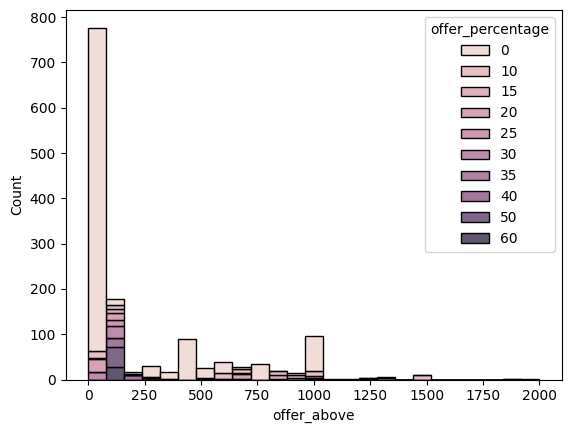

In [40]:
sns.histplot(data=df,x=df['offer_above'],hue=df['offer_percentage'],multiple='stack')

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='offer_above', ylabel='offer_percentage'>

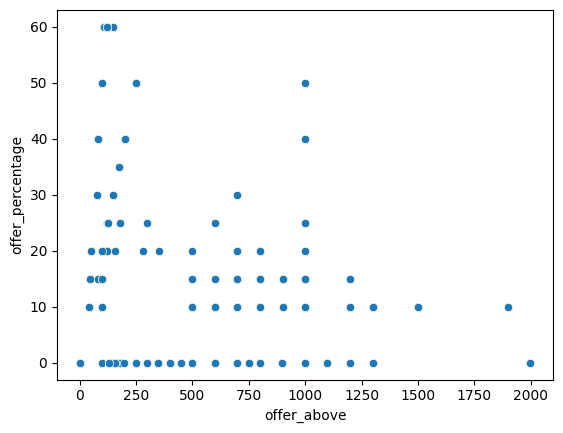

In [44]:
sns.scatterplot(df,x=df['offer_above'],y=df['offer_percentage'])

### top 10 resturants by rating

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


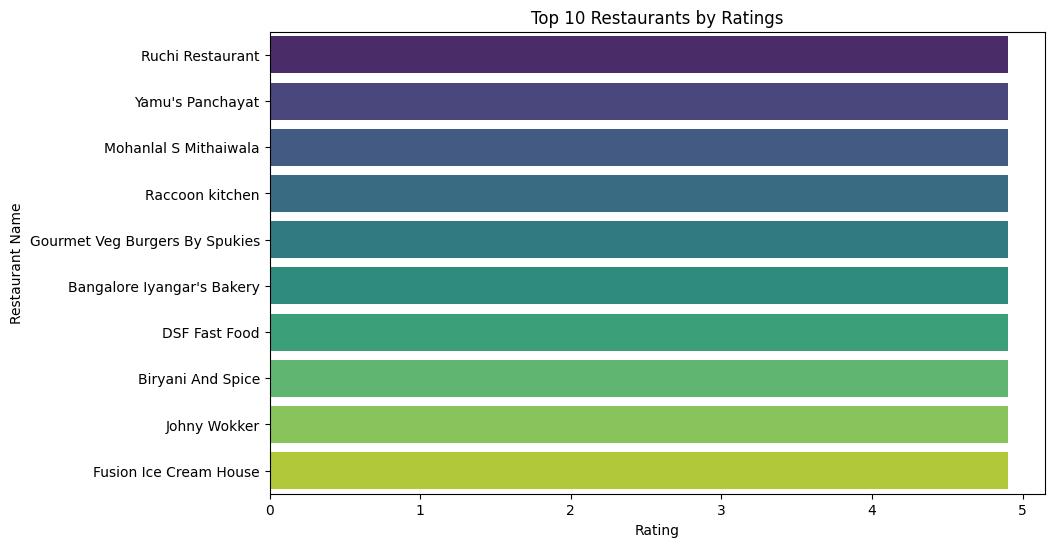

In [51]:
top_rated=df.sort_values(by='rating',ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated,x='rating',y='hotel_name',palette='viridis')
plt.title('Top 10 Restaurants by Ratings')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.show()

### bottom 10 resturants by rating

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


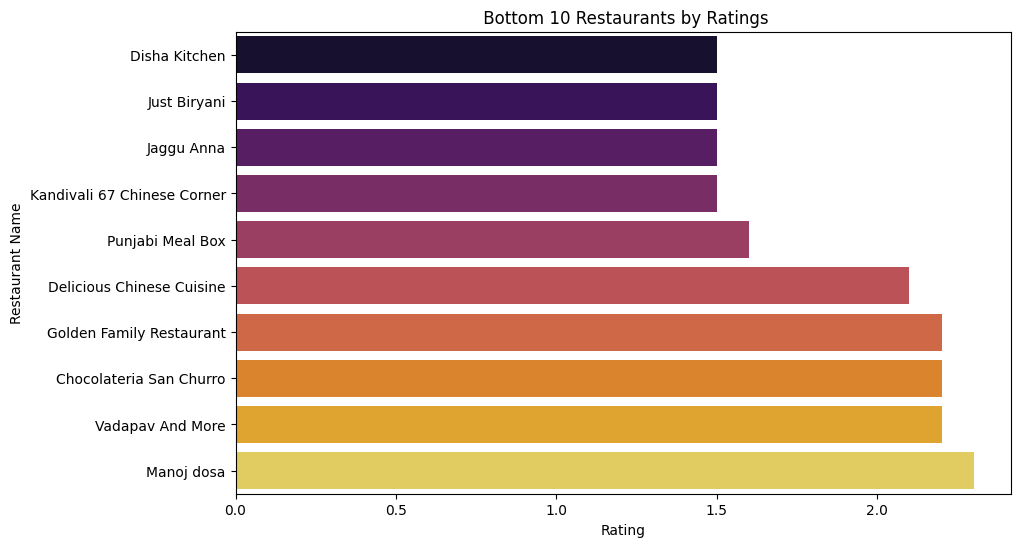

In [54]:
below_rated=df.sort_values(by='rating',ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=below_rated,x='rating',y='hotel_name',palette= 'inferno')
plt.title(' Bottom 10 Restaurants by Ratings')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.show()

### 10 Restaurants who takes a lot of time

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


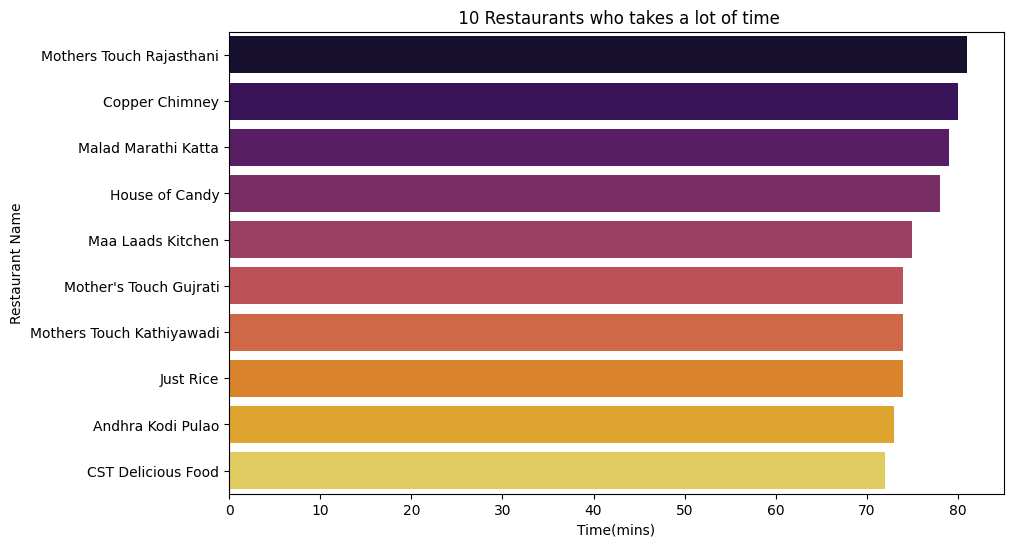

In [57]:
dlv_time=df.sort_values(by='time_minutes',ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=dlv_time,x='time_minutes',y='hotel_name',palette= 'inferno')
plt.title(' 10 Restaurants who takes a lot of time')
plt.xlabel('Time(mins)')
plt.ylabel('Restaurant Name')
plt.show()

### 10 Restaurants who takes less time

c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Program Files\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


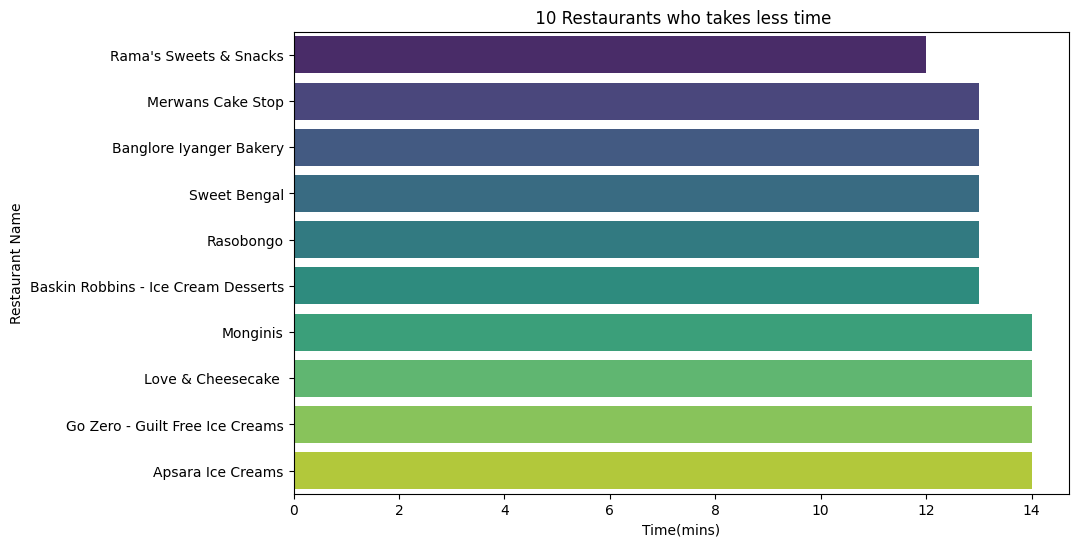

In [64]:
time=df.sort_values(by='time_minutes',ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=time,x='time_minutes',y='hotel_name',palette= 'viridis')
plt.title(' 10 Restaurants who takes less time')
plt.xlabel('Time(mins)')
plt.ylabel('Restaurant Name')
plt.show()

### food type distribution

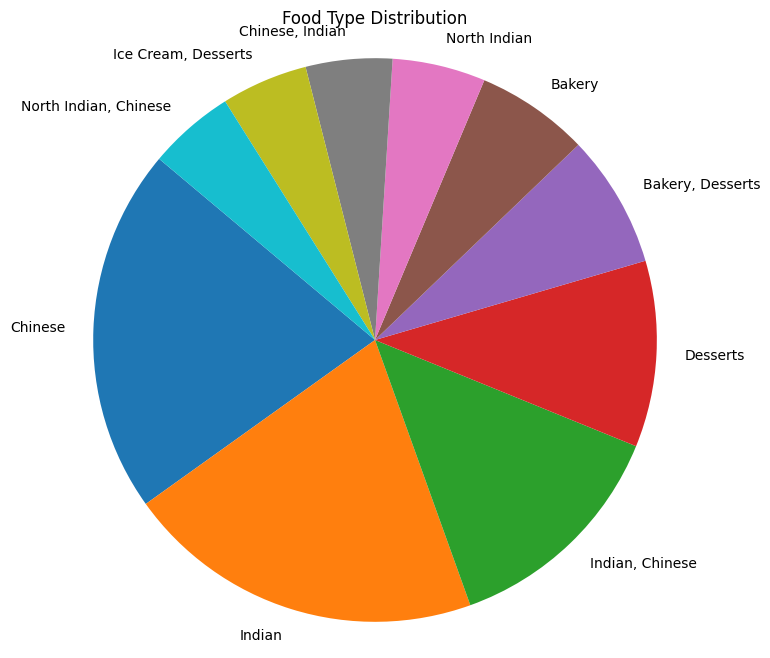

In [71]:
food_type_count=df['food_type'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))

plt.pie(food_type_count, labels = food_type_count.index, startangle=140)
plt.title('Food Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Minimum Order Value for Offers Across Restaurants
### Average Percentage of Discount Offered Across Restaurants

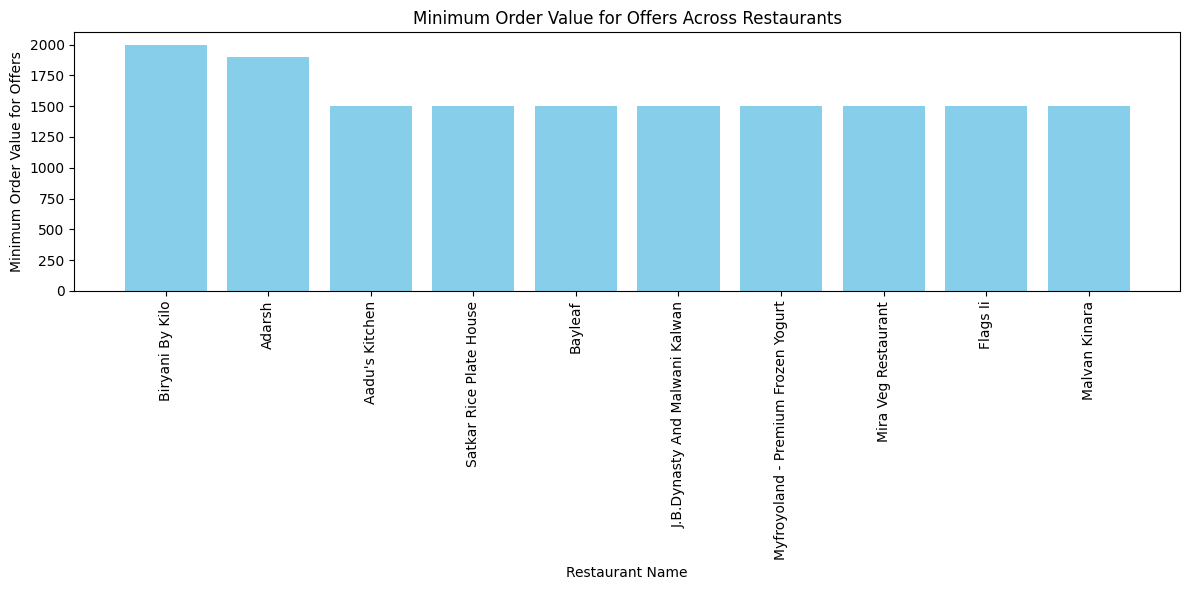

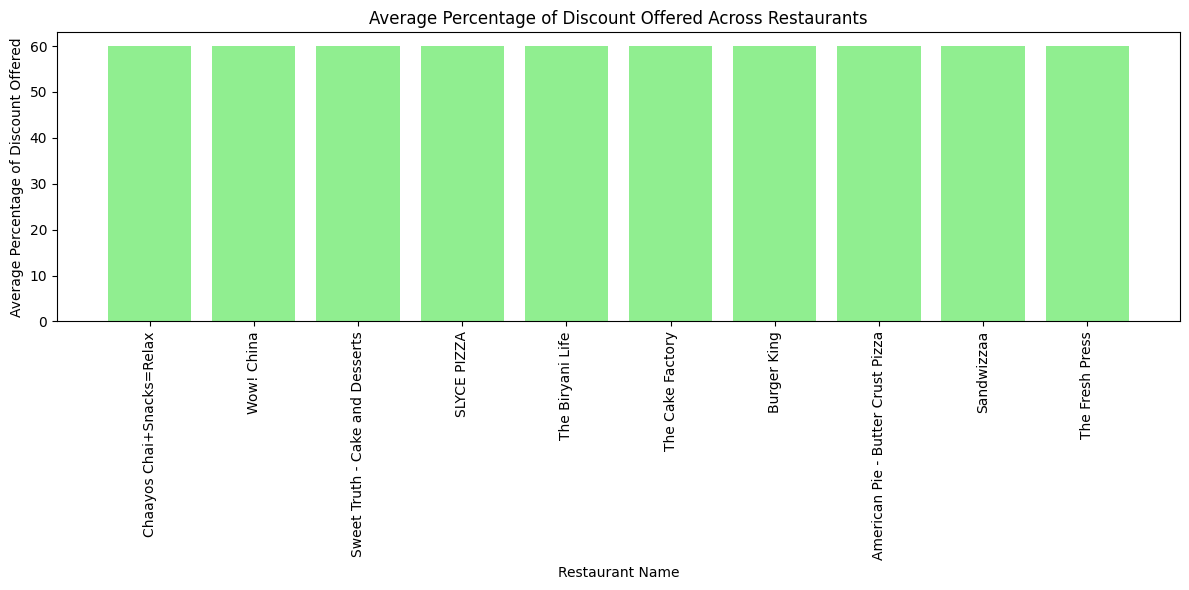

In [75]:
min_order_values = df.groupby('hotel_name')['offer_above'].min().sort_values(ascending=False).head(10)

# Group the DataFrame by 'hotel_name' and calculate the average percentage of discount offered
avg_discount = df.groupby('hotel_name')['offer_percentage'].mean().sort_values(ascending=False).head(10)

# Plot the bar plot to compare minimum order values required for offers
plt.figure(figsize=(12, 6))
plt.bar(min_order_values.index, min_order_values.values, color='skyblue')
plt.xlabel('Restaurant Name')
plt.ylabel('Minimum Order Value for Offers')
plt.title('Minimum Order Value for Offers Across Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the bar plot to visualize the average percentage of discount offered by each restaurant
plt.figure(figsize=(12, 6))
plt.bar(avg_discount.index, avg_discount.values, color='lightgreen')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Percentage of Discount Offered')
plt.title('Average Percentage of Discount Offered Across Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()